In [10]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [5]:
file = "C:\\Users\\16786\\Downloads\\data\\Parsed_Capuchinbird_Clips\\XC3776-0.wav"

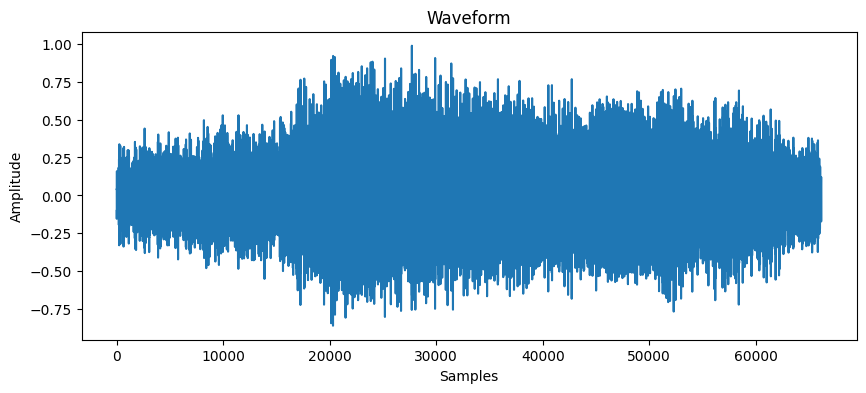

In [9]:
# Load the audio file
signal, sr = librosa.load(file, sr=22050)  # Load with a sample rate of 22050 Hz

# Plot the waveform
plt.figure(figsize=(10, 4))  # Set the figure size
plt.plot(signal)
plt.title('Waveform')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

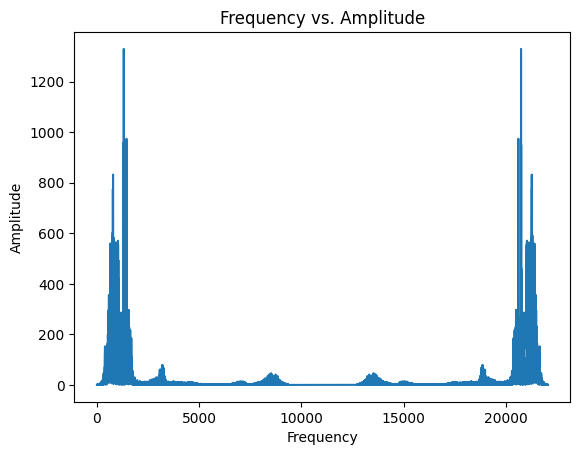

In [12]:
# Fast-Fourier Transform -> Spectrum
fft = np.fft.fft(signal)

magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))
plt.plot(frequency, magnitude)
plt.title('Frequency vs. Amplitude')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

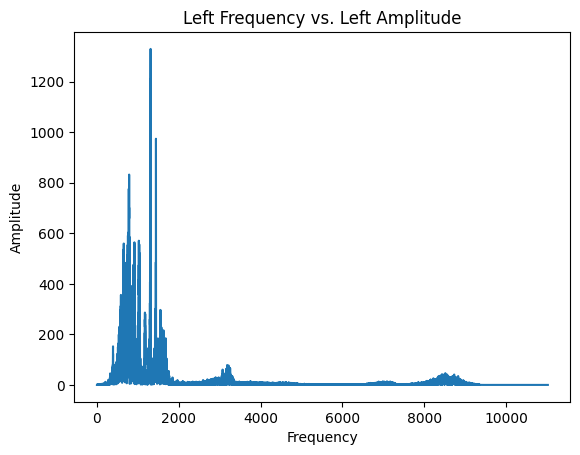

In [13]:
# Left side of Spectrum Analysis
left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(frequency)/2)]

plt.plot(left_frequency, left_magnitude)
plt.title('Left Frequency vs. Left Amplitude')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

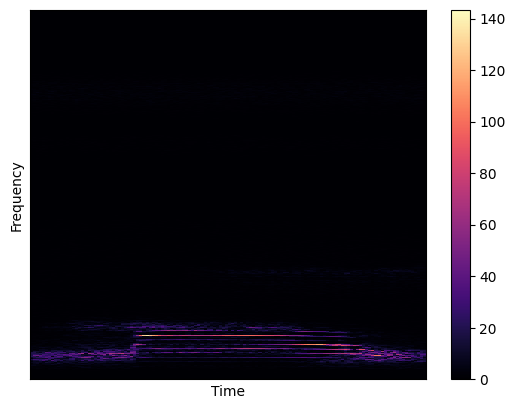

In [15]:
# Short-Time Fourier Transform -> Spectrogram
n_fft = 2048 # number of samples per Fast-Fourier Transform
hop_length = 512 # number of FFT shifts (in intervals)

stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)

spectrogram = np.abs(stft)

librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

^Linear way of preceiving the loudness (amplitude) of audio. We want the logarithmic of this.

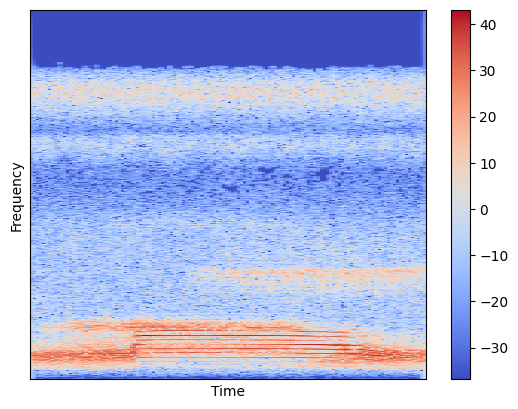

In [16]:
log_spectrogram = librosa.amplitude_to_db(spectrogram)

librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.colorbar()
plt.show()

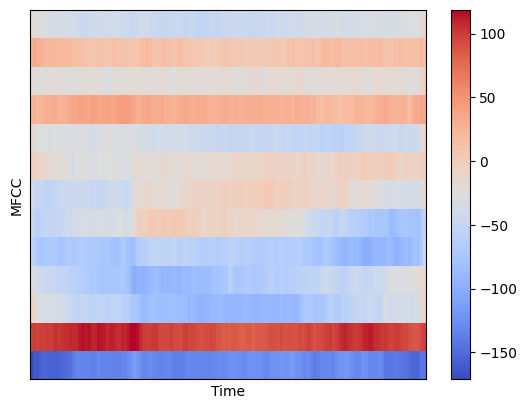

In [19]:
# Mel-Frequency Cepstral Coefficients
# Captures timbral/textural aspects of sound
# Time -> Frequency domain feature
# Helps us approximate human auditory system (the way humans process audio visually
# Coefficients calculated at each frame
MFFCs = librosa.feature.mfcc(y=signal, n_fft=n_fft, hop_length=hop_length, n_mfcc=13) # 13 to 40 is common for music
librosa.display.specshow(MFFCs, sr=sr, hop_length=hop_length)
plt.xlabel('Time')
plt.ylabel('MFCC')
plt.colorbar()
plt.show()

In [ ]:
print("Hello World")